In [16]:
import numpy as np #useful for math operations
import matplotlib
import matplotlib.pyplot as plt #plotting
import seaborn as sns #pretty plots
sns.set()
sns.set_context('talk')
sns.set_style("whitegrid", {'axes.grid' : False})

import GPy
from sklearn.preprocessing import StandardScaler #useful for scaling data

import time

import gaussian_random_fields as gr

In [33]:
#setup the grid params
nx = 400 # number of pixels
dx = 0.05 # pixel size in fm

x_max = (nx-1)* dx / 2.

X = np.arange(-x_max, x_max, dx)

XX, YY = np.meshgrid(X, X)

In [34]:
def yield_psi(nx, dx, l_corr):
    alpha = l_corr / dx # the correlation length in units of pixel size
    Z = gr.gaussian_random_field(alpha = alpha, size = nx)
    #rescale to [0, 2pi]
    psi = (2.*np.pi)*(Z - np.min(Z))/np.ptp(Z)
    return psi

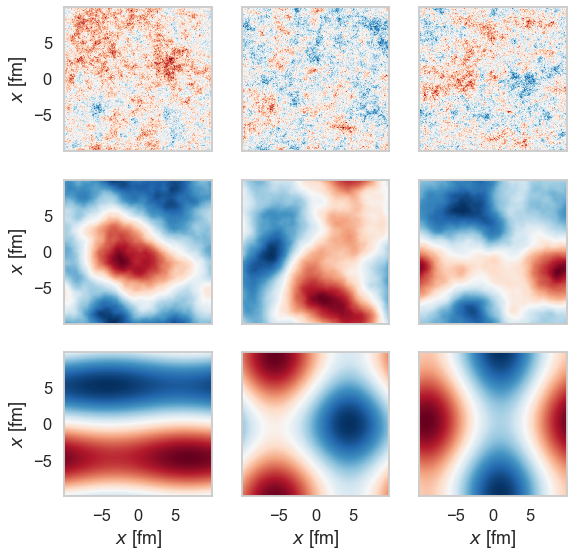

In [48]:
l_corrs = [.1, .25, 1.]
fig, axes = plt.subplots(3,3,figsize=(9,9), sharex='col', sharey='row')
for row, l in enumerate(l_corrs):
    for col in range(3):
        psi = yield_psi(nx, dx, l)
        axes[row, col].pcolor(XX, YY, psi.T, cmap='RdBu', vmin=0, vmax=2*np.pi)
        if axes[row, col].is_last_row():
            axes[row, col].set_xlabel(r'$x$ [fm]')
        if axes[row, col].is_first_col():
            axes[row, col].set_ylabel(r'$x$ [fm]')